## 모두를 위한 딥러닝 #4

지난 강의에 이어지는 내용으로 CNN을 활용해서 만든 다양한 구조의 모델들에 대해 설명한다. 여기서 다룰 모델은 이미지 관련 가장 큰 대회인 Imagenet competition에서 높은 성적을 낸 모델들이다. (*Imagenet competition은 이미지 데이터셋이 주어지고 종목(분류, 세분화 등)별로 평가 기준이 있어서 가장 높은 성능을 낸 모델에 상금이 주어진다.*)

모델을 알아야 하는 첫번째 이유는 **사용하기 위함** 인데, 우리는 연구자가 아니기 때문에 모델을 구축해서 사용하는 것이 불가능하다. 그럼, 남들이 만들어 놓은 대중적이면서도 성능이 좋은 것을 갖다 써야 하는데 이 표본이 되어 주는 것들이 바로 소개하려는 모델들이다.

두번째 이유는 **내가 뭘 쓰는지는 알고 쓰는 것**이 중요하기 때문이다. 어떤 방향으로 연구가 진행되어 왔고 그 중에 어떤 것들이 성능을 좋게 만들었는지에 대한 흐름 정도는 파악을 하고 있는 것이 좋다. 그래야 점점 더 발전되었을 때 잘 갖다 쓸 수도 있고 관련된 많은 정보들을 쉽게 받아들일 수 있으니까 말이다.

### 학습 순서
- 모델의 발전 변천사 살펴보기
    - AlexNet ('2012 1위)
    - VGGNet ('2014 2위)
    - GoogleNet ('2014 1위)
    - ResNet ('2015 1위)  
- 이미 학습이 된(pre-trained) 모델 사용하기

### 모델 별 성능 변화
년도 별로 진행한 imagenet 대회 이미지 분류 종목의 대표적인 모델의 성능은 아래와 같다. 해마다 모델들이 발전되었고 15년에 들어서 일반인의 기준인 5%-error 보다 낮아져서 이미지 분류에 있어서는 ***학습 데이터가 많은 경우*** 사람보다 더 분류한다고 볼 수 있다. 망의 깊이가 해가 지날수록 깊어진다. 깊은 망을 만든다는 생각은 누구나 할 수 있지만 Overfitting을 어떻게 막고 Vanishing gradient 문제는 어떻게 해결할지에 대한 고민이 필요하다. 어떤 흐름을 따라서 많은 문제들을 해결하고 성능을 좋게 만들었는지 살펴보도록 하자.
![trend](http://paddlepaddle.org/docs/develop/book/03.image_classification/image/ilsvrc.png)

### AlexNet
딥러닝의 아주 대표적인 모델이다. 2012년도에 Imagenet 대회에서 기존 전통적인(?) 머신러닝 기법들을 큰 차이로 누르고 1등을 한 모델이다.
이게 기폭제가 되어 2012년부터 지금까지 많은 회사나 연구자들이 딥러닝 분야에 집중하고 있다. 실제로 순수한 딥러닝에 대해서만이 아니라 모든 산업계에 적용이 가능한 부분이라서(*데이터만 있다면!*) 분야를 막론하고 **적용되기 시작**하고 있다.

#### 1) 구조
구조는 아래 그림과 같다. 음..매우 단순한 CNN이라고 생각하면 쉽다. 그림에서 나타나듯이 전 시간에 배운 Convolutional, Activation, Pooling, Fully Connected Layer로만 구성이 된다.(*사실 하나 layer가 더 있는데 지금 안 써서 따로 소개는 안 한다.*) 모델의 구조가 아래 위로 나뉘어져서 표현되어 있는 것은 당시에는 **GPU 성능이 별로 안 좋아서** 나눠서 학습시킨 후 합치는 방법을 사용해서 그렇다. 어떻게 보면 병렬 처리라고도 볼 수 있는데 요즘에는 GPU가 좋아서 저런 방식으로 학습하지 않는다.
![AlexNet](http://blog.paralleldots.com/wp-content/uploads/2017/08/Image-Classification-AlexNet.png)

#### 2) 의의
사실 **LeNet** 이라고 AlexNet 이전에 CNN을 사용한 모델이 존재했다. 하지만 깊은 망의 구현에 실패해서 단순한 MNIST와 같은 인식에만 사용했다. AlexNet은 LeNet, 기존 모델을 ***Deep 하게*** 확장하기만 했는데 당시에는 누구도 이렇게 성능이 잘 나올 것이라고 생각하지 않았기 때문에 
실제로 **Deep한 구조를 만들었을 때 성능이 매우 좋아질 수 있다.** 라는 것을 증명했다는 점이 중요하다. 그리고 Deep해지는 경우에 자연스레 연산량이 커지게 되는데 **GPU로 이를 처리할 수 있다**는 것을 보였다는 점도 중요하다. 

많은 딥러닝에 대한 소개하는 내용에 GPU(하드웨어)의 발전과 학습에 관한 Bottleneck(Vanish gradient, ReLu..)의 얘기가 나오는데 딱 AlexNet이 이 2가지가 준비가 되었다라는 것을 보여준다.

### VGGNet

#### 1) 구조
2014년에 2등을 한 모델이다. 1등인 GoogleNet과 함께 해당 년도의 대표적인 모델로 소개되는데 그 이유는 아주 단순한 형태의 network라서 사람들이 많이 사용했기 때문이다.

이 전 모델로 다시 거슬러가면 2가지 개선 가능점(*문제점*)이 존재했다. 첫번째로는 ***얼마나 더 Deep하게*** 쌓을 수 있을까에 대한 궁금증과 
그 때의 ***연산, 메모리를 어떻게 효율적***으로 다룰 수 있을까? 이다.

VGGNet은 2가지 측면에 대해서 접근하고 있기는 하지만 주로 **Depth**에 초점을 맟춘다. AlexNet과 비교한 구조에서 볼 수 있듯이 layer 수를 2배 이상 증가시켰다. 아래 table에 쓰여있는 구조를 좀 들여다보면 특이한 점을 알 수 있는데 모든 layer가 3x3 conv로 이루어져 있다. 이 설계는 Network in Network - Lin et al. 이라는 논문의 영향을 받았다. 3x3 conv는 어떻게 보면 가장 작은 단위로 볼 수 있는데 이를 통해 얻을 수 있는 이점이 2가지가 있다. 첫째로는 메모리를 크게 줄일 수 있다. 7x7 conv는 3x3 conv를 2개 이었을 때 같은 역할을 할 수 있다. 하지만 parameter 수를 계산해보면 $49 > 9\times2$로 크게 줄었다는 것을 볼 수 있다. 두번째로는 3x3 conv를 2번 통과하면 ReLU도 2번 통과하게 될텐데 그럼..**Non-linearity**가 증가하게 된다. 이렇듯 구조의 변화를 통해서 더 **Deep**하게 구조를 만들고, **Non-linearity**도 증가시켜서 결론적으로 좋은 성능을 냈다. 

![alexnet vs VGGnet](http://www.hirokatsukataoka.net/research/cnnfeatureevaluation/cnnarchitecture.jpg)

아래 표는 VGGNet의 전체 구조를 나타낸 것이다. (논문) A-E까지 다양하게 있는 이유는 새로운 구조를 추가할 때 reference로 비교하기 위함이다.

![VGGNet archi](http://euler.stat.yale.edu/~tba3/stat665/lectures/lec18/img/vggModel.jpg)

아래는 VGGNet에 $224 \times 224$ 이미지 한 장이 처리될 때의 memory와 parameter수를 나타내준다. memory의 경우에 초기 망에 많이 몰려있고 parameter의 경우에는 FC에 대부분 몰려있는 것을 알 수 있다. 그 이유는 이미지의 크기가 초기 망에서 크기 때문에 이 데이터를 저장하려면 memory가 많이 필요하기 때문이고, FC에서 `num_classes`로 바꿔줄 때 `W`의 parameter가 많이 필요하기 때문이다. 1장 돌리는데 100MB라고 생각하면 왜 이런 모델을 노트북에서 돌리는게 불가능한지 알 수 있다..

![VGGNet_parameter](../pictures/vggnet.png)

#### 2) 의의
**AlexNet**이 나온 뒤로 더 깊은 구조를 만들었을 때 더 성능이 좋게 나올 것인가? 라는 측면에서 많은 연구가 진행되었다. VGGNet의 경우 아주 단순한 방법으로 접근했으며 깊은 구조를 통해서 성능 개선의 여지가 남아 있음을 보여주었다.

### GoogleNet

GoogleNet도 VGGNet와 같은 시기에 나온 모델이기 때문에 같은 문제를 다루고 있다. VGGNet이 아주 단순한 방법을 사용한 것을 봤을 때 GoogleNet은 최소한 성능이 조금 더 좋으므로 다른 방법을 사용했을 것으로 생각할 수 있다.

#### 1) 구조 
GoogleNet에 새롭게 추가된 것들을 살펴보자. 크게 2가지이다. 
- Global average pooling layer  <br>
Global average pooling은 VGGNet에서 살펴본 FC의 엄청난 수의 parameter를 해결해준다. 방식은 간단하다. 기존에 마지막 2개 layer가 FC로 구성되어 최종적으로 `num_classes`의 수만큼 예측값을 얻는데, 첫번째 FC가 많은 parameter를 필요로 한다. shape로 나타내면 `[width * height * depth, 4096]`이 된다. 두번째 FC는 `[4096, 10]`이라고 생각했을 때 그다지 많아 보이지는 않아서 실제 문제는 FC1이다.
**CNN 모델들은 망이 깊어질 수록 영역에 대한 많은 정보를 다양하게 표현하기 위해서 depth가 커지는데**(*width, height는 줄어든다.*) 이 때문에 parameter가 많아진다. 그래서 **global average pooling은 그냥 전체 depth를 평균을 내버린다.** 그럼 첫번째 FC를 넘어가고 두번째 FC로 넘어가는 것과 동일하게 진행된다. *heuristic*한 방법이라고 생각하면 되며 성능 저하가 거의 없어 이 후 모델들에서는 대부분 이 방법을 사용하게 된다.

![googlenet archi](https://3.bp.blogspot.com/-8Lsg0rnxl7k/WRtttN18MKI/AAAAAAAAB0o/KpHbFnYBmTYQ3dBjVLimPUkKphU_qLBfgCLcB/s1600/image2.png)

- Inception 모듈 <br>
위 GoogleNet 전체 구조를 보면 수평적으로도 망들이 퍼져있는 듯한 모습을 취한다는 것을 볼 수 있다. 그게 바로 inception 모듈이다. 직관적으로 같은 영역을 여러 개의 filter로 본 뒤에 정보를 합쳐서 전달해주면 좋을 것이라고 생각할 수 있다. 근데, 한가지 문제가 발생하는데 바로 계산 복잡도가 너무 높아진다는 것이다. 아래 그림을 보면 854M ops로 1개 module을 통과하는데 연산량이 엄청 큰 것을 볼 수 있다.

![inception_module](../pictures/naive_inception.png)

이를 해결하기 위해서 VGGNet와 우연하게도 같은 방법을 사용한다.(Network in Network. Lin et al. 에서 차용) 7x7 conv를 3x3 2개로 쪼갠 것처럼 3x3 conv를 3x3 conv와 1x1 conv로 쪼갤 수 있다! 쪼갤 경우에 depth를 두 번에 나눠서 감소시키게 되므로 parameter는 조금 늘게 되지만(1x1 conv는 그래봤자 parameter가 작다.) 연산량이 아래처럼 크게 감소하게 된다. 또한, **non-linearity도 증가시킬 수 있게 된다.**
![inception_module](../pictures/bottleneck_inception.png)

#### 2) 의의
더 깊은 구조를 만들었다는 의의가 있고 그 외에도 현재 문제점에 대해서 새로운 시도들을(***global average pooling, inception module, ...***)했고 효과적이었다는 것을 보여주었다.

### ResNet

ResNet은 끝판왕이라고 생각하면 된다. ResNet이 나오고나서 Human-level에 해당되는 5%의 벽을 깼고 더 이상 imagenet 대회에서 분류 종목이 의미가 없어져서 사라졌다. 

ResNet이 접근한 문제는 단순하다. **더 더 더 더 깊은 망을 설계하면 어떻게 될까?** 지금까지 20개 망으로 이루어진 구조를 봤는데 100개, 1000개면 어떻게 될까라는 물음이다. 이런 접근을 통해서 새로운 문제점을 발견하고 이를 해결는 과정에서 ResNet이 나오게 되었다.

#### 1) 구조
구조를 보기 전에 먼저, 어떤 문제를 발견했는지 살펴보자. 아래는 망을 깊게 만들었을 때 성능이 어떻게 되는지에 대한 그래프이다. 특이한 점을 발견할 수 있는데 training error가 망이 깊어짐에 따라서 더 낮아진다. 지금까지 배운 내용과 다르다... ***모델이 복잡해지면 당연히 overfitting이 발생하더라도 training error는 낮아져야 정상인데?*** 이러한 현상을 논문 저자는 **Degradation** 이라고 부른다. 
![resnet](../pictures/resnet.png)

왜 이런 문제가 발생할까에 대한 고민을 하던 중 그냥 망을 통과할 수 있게 만드는 identity layer를 붙여보지만 그럼에도 성능이 낮아졌다.

모델의 depth가 깊어질수록 원래 성능이 최소한 그대로이기 위해서는 망이 identity 역할을 해야 하는데 이 역할을 제대로 못하는 구나라고 인식을 하게 된다. 그래서 그럼 identity 역할을 조금 잘할 수 있도록 식을 바꿔주면 어떨까? 라고 생각해서 나온 것이 **Residual block** 이다. 식의 방향에 identity를 넣어줘서 최소한 identity 역할을 잘할 수 있도록 만들어준 것이다.
![residual block](../pictures/residual_block.png) 

이 구조가 아주 깊게 설계해도 성능을 잘 내는 한 가지 이유를 덧붙이면 **vanishing gradient** 문제를 구조 상의 특징이 상당 부분 해결하기 때문이다. residual block과 같이 identity로 지나갈 수 있다는 뜻은 정보가 망이 얼마나 깊든 관계없이 손실없이 처음부터 끝까지 갈 수 있다는 뜻이다. 또, **batch normalization**도 추가해서 학습을 도와준다. 
![resnet](http://cv-tricks.com/wp-content/uploads/2017/04/xresnet.png.pagespeed.ic.dRsx6hR6zs.png)

#### 2) 의의
ResNet이 나오면서 CNN 기반의 모델을 사용해서 이미지 분류를 어느 정도까지 할 수 있을까? 라는 의문은 사라진지 오래되었다. 대신 이제 새롭게 얼마나 작은 모델로 좋은 성능을 낼 수 있을까에 대해 많은 접근이 이루어지고 있다. 지금까지는 대충 돈을 퍼부어서 어마어마한 모델을 만들었다고 하면 이젠 실제로 사용자들이 쓸 수 있는 작고 좋은 모델에 초점을 맞추고 있다.


### 정리 
위 4개 모델을 이미지 분야에서 딥러닝의 발전을 이룬 대표적인 모델로 볼 수 있다. 짧게 살펴봤지만 느껴지듯이 문제점이 있으면 이를 해결하기 위한 방향으로 고민하고 새로운 것을 만들어 내면서 점점 발전하는 모습을 취하고 있다. (*거의 모든 분야가 그렇지만*) 방향은 대부분 문제를 보면 모두에게 주어지지만 이 것을 실제로 해결하는 사람들이 대단한 것 같다.

아래 표는 모델 별로 복잡도와 성능을 비교해놓았다. 

![complexity](../pictures/complexity.png)

아래 코드에서는 Googlenet에 사용된 모델을 불러와서 우리가 가진 데이터를 분류할 수 있는지 살펴보자.

- Pre-trained model 다운로드
- tensorflow로 불러오기 
- 예측해보기
- 심화: 다른 데이터로 추가 학습시켜보기

In [1]:
import tensorflow as tf

Pre-trained model 다운로드, tensorflow 사이트에서 받을 수 있다.

In [2]:
import sys
import tarfile
import os
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [3]:
fetch_pretrained_inception_v3()

Downloading: 90%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


Downloading: 100%

inception_v3의 학습에 사용된 데이터 종류 확인

In [4]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [5]:
class_names = load_class_names()

다양한 동물 이미지로 학습된 것을 알 수 있다.

In [6]:
class_names[:5]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark']

모델로 확인할 동물 이미지를 가져와보자. (299x299x3 이미지이다.)

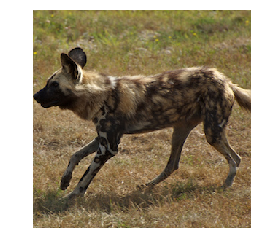

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join(INCEPTION_PATH, 'test_image.png'))
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [8]:
test_image.shape

(299, 299, 3)

모델을 불러올 때는 2가지를 반드시 신경써야 한다.
1. 전체 모델 구조를 불러오거나 직접 짜야한다. (**graph**) -> 구현 or meta 파일(용량이 작다.)
2. 1에서 만든 구조(graph)위에 **정확하게 같은 변수 이름**이 매칭이 되어야 불러올 수 있다. -> ckpt 파일(용량이 크다.)

먼저, inception_v3 모델의 구조를 불러오자. (tensorflow 내에 사용하기 좋게 모델 구조를 만들어 놓았다.)

In [9]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]

In [10]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

test 이미지 데이터의 shape를 바꿔서 4-d tensor (`[batch_size, height, width, channels]`)로 만들어준다.

그리고 변수들을 불러와서 위 사진을 예측해보자.

In [11]:
X_test = test_image.reshape(-1, *test_image.shape)

In [12]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


In [13]:
predicted_id = np.argmax(predictions_val)
predicted_id

276

정확하게 하이에나를 예측했다.

In [14]:
predictions_val[0, 276]

0.93849027

상위 5개를 몇 % 정도로 예측했는지 살펴보자.

In [15]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = top_5[np.argsort(predictions_val[0][top_5], axis=-1)]
for i in reversed(top_5):
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

hyena, hyaena: 93.85%
red fox, Vulpes vulpes: 2.36%
common newt, Triturus vulgaris: 0.05%
beer bottle: 0.05%
swing: 0.04%


구글에서 아무 동물 사진을 가져와서 분류가 되는지 살펴보자.

In [16]:
from scipy.misc import imresize

In [17]:
sealion_image = mpimg.imread(os.path.join(INCEPTION_PATH, 'sealion.jpeg'))

In [18]:
sealion_image = imresize(sealion_image, (299, 299))

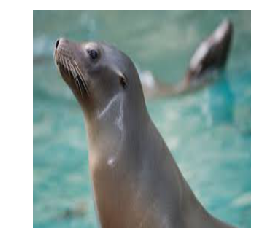

In [19]:
plt.imshow(sealion_image)
plt.axis("off")
plt.show()

In [21]:
X_sealion = sealion_image.reshape(-1, *sealion_image.shape)

In [22]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_sealion})
    
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = top_5[np.argsort(predictions_val[0][top_5], axis=-1)]
for i in reversed(top_5):
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt
nematode, nematode worm, roundworm: 99.92%
cocktail shaker: 0.07%
comic book: 0.01%
plane, carpenter's plane, woodworking plane: 0.00%
birdhouse: 0.00%


In [80]:
X_sealion.shape

(1, 299, 299, 3)

In [74]:
class_names

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f